In [1]:
#importing main data analysis libraries  
import pandas as pd 
import numpy as np
#importing main visualization libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#importing modules from sklearn for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df=pd.read_csv('tripadvisor_review.csv')

In [3]:
df.head()

,User ID,art galleries,dance clubs,juice bars,restaurants,museums,resorts,parks/picnic spots,beaches,theaters,religious institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [4]:
df.shape

(980, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 980 non-null    object 
 1   art galleries           980 non-null    float64
 2   dance clubs             980 non-null    float64
 3   juice bars              980 non-null    float64
 4   restaurants             980 non-null    float64
 5   museums                 980 non-null    float64
 6   resorts                 980 non-null    float64
 7   parks/picnic spots      980 non-null    float64
 8   beaches                 980 non-null    float64
 9   theaters                980 non-null    float64
 10  religious institutions  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [6]:
df.isnull().sum()

User ID                   0
art galleries             0
dance clubs               0
juice bars                0
restaurants               0
museums                   0
resorts                   0
parks/picnic spots        0
beaches                   0
theaters                  0
religious institutions    0
dtype: int64

In [7]:
df = df.drop(columns = 'User ID', axis = 1)

In [8]:
pca = PCA(n_components= 2)

In [9]:
pca_1 = pca.fit_transform(df)

In [10]:
pca_1

array([[ 1.39140784, -0.06325254],
       [ 2.22564886,  0.66056077],
       [-0.67726766, -0.51264503],
       ...,
       [-0.27318478,  0.21082073],
       [-1.50784123, -1.24834691],
       [ 0.436563  ,  0.11913389]])

In [11]:
pca.components_

array([[ 0.00292433,  0.07383989,  0.84824271,  0.0528678 ,  0.26097431,
         0.39896681,  0.00701843, -0.0250407 , -0.01537942, -0.20984158],
       [-0.04330094,  0.38398947, -0.47996876,  0.12044576,  0.43461828,
         0.61494583, -0.00112407,  0.0170712 ,  0.17868969, -0.08078241]])

In [12]:
new_df = pd.DataFrame({'PCA_1': pca_1[:, 0], 'PCA_2': pca_1[:, 1]})

In [13]:
new_df.head()

,PCA_1,PCA_2
0,1.391408,-0.063253
1,2.225649,0.660561
2,-0.677268,-0.512645
3,-0.849739,0.132922
4,0.420059,0.202708


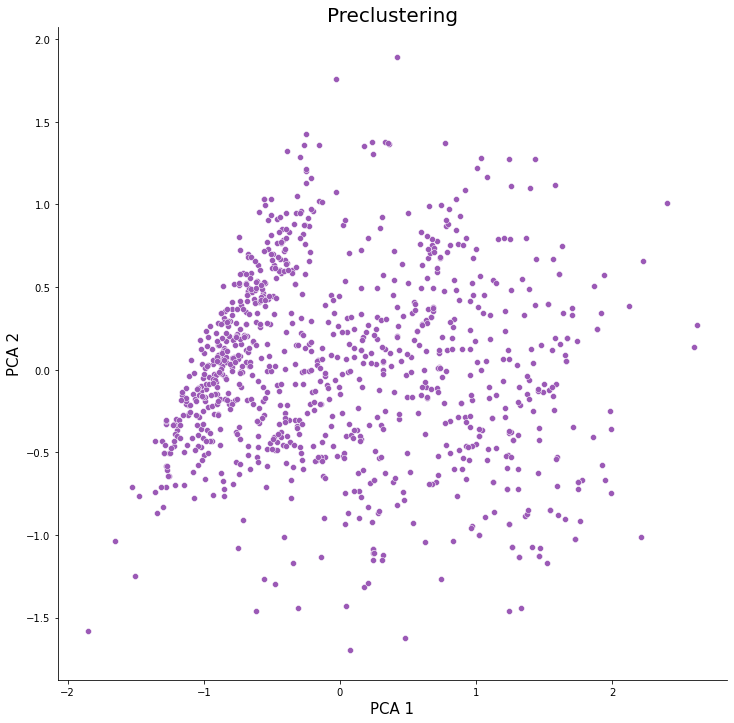

In [19]:
cluster_test = plt.subplots(figsize=(12, 12))

cluster_test = sns.scatterplot(x = 'PCA_1', y = 'PCA_2', data = new_df, color = '#9b59b6')


sns.despine()
cluster_test.set_xlabel('PCA 1', fontsize = 15)
cluster_test.set_ylabel('PCA 2', fontsize = 15)
cluster_test.set_title('Preclustering', fontsize = 20)
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 5)

In [21]:
kmeans.fit_transform(new_df)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([[4.61744448, 0.34908875, 2.17249176, 2.19828902, 3.31460128],
       [5.15856253, 1.38666678, 2.48117259, 2.86865141, 3.87493327],
       [0.37174842, 4.4824716 , 2.66910002, 3.19619675, 1.22857169],
       ...,
       [3.09726816, 1.99911605, 1.47204117, 0.40431614, 2.12444421],
       [1.18739183, 4.98320073, 3.50062616, 3.66008029, 2.00761692],
       [2.43503019, 2.25846793, 0.50980778, 1.41722443, 1.21357184]])

In [22]:
new_df['cluster'] = kmeans.labels_

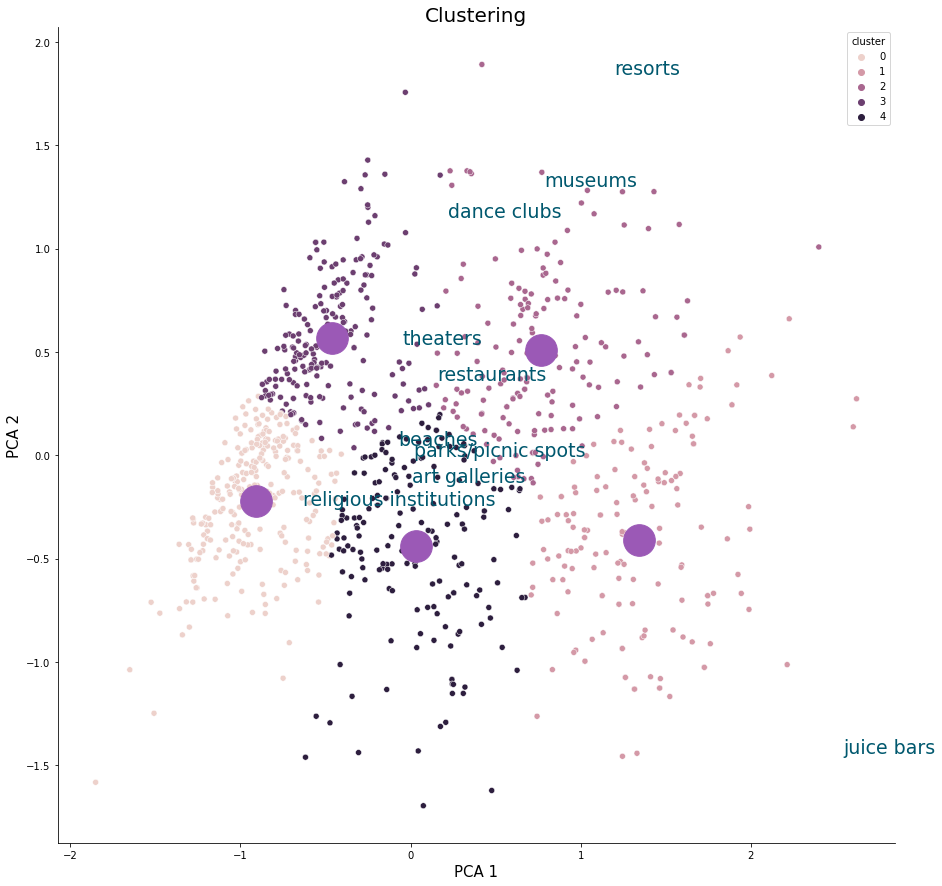

In [23]:
cluster = plt.subplots(figsize=(15, 15))
cluster = sns.scatterplot(x = 'PCA_1', y = 'PCA_2', data = new_df, hue = 'cluster')
cluster.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1], c = '#9b59b6', s = 1000, marker = 'o')

coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
columns = list(df.columns)

for i in range(n):
    plt.text(coeff[i,0]*3, coeff[i,1]*3, columns[i], size = 19,color = '#00586e')
    
    
sns.despine()
cluster.set_xlabel('PCA 1', fontsize = 15)
cluster.set_ylabel('PCA 2', fontsize = 15)
cluster.set_title('Clustering', fontsize = 20)
plt.show()